In [1]:
import pandas as pd
import sklearn
from helpers import *
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from data.unlabeled import aquastat_eah, aquastat_wr, aquastat_wu, aquastat_cc
import seaborn as sns
import os

..\data\unlabeled\__init__.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_eah = pd.read_csv(aquastat_eah_path, skipfooter=8)
..\data\unlabeled\__init__.py:42: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_wr = pd.read_csv(aquastat_wr_path, skipfooter=8)
..\data\unlabeled\__init__.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_wu = pd.read_csv(aquastat_wu_path, skipfooter=8)


In [2]:
aquastat_wr

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Afghanistan,4,National Rainfall Index (NRI),4472,2017,185.000000,I,0
1,Afghanistan,4,Total internal renewable water resources per c...,4158,2017,1299.037172,E,0
2,Afghanistan,4,Dependency ratio,4192,2017,28.722600,E,0
3,Afghanistan,4,Total renewable water resources per capita,4190,2017,1799.917253,E,0
4,Afghanistan,4,Interannual variability (WRI),4541,2017,2.500000,I,0
...,...,...,...,...,...,...,...,...
1224,Zimbabwe,716,Dependency ratio,4192,2017,38.700000,E,0
1225,Zimbabwe,716,Total renewable water resources per capita,4190,2017,1404.830298,E,0
1226,Zimbabwe,716,Interannual variability (WRI),4541,2017,3.100000,I,0
1227,Zimbabwe,716,Seasonal variability (WRI),4542,2017,3.700000,I,0


In [3]:
aquastat_wu

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Afghanistan,4,Agricultural water withdrawal as % of total wa...,4254,2017,98.169627,E,0
1,Afghanistan,4,Industrial water withdrawal as % of total wate...,4256,2017,0.831988,E,0
2,Afghanistan,4,Municipal water withdrawal as % of total withd...,4255,2017,0.998385,E,0
3,Afghanistan,4,Total water withdrawal per capita,4257,2017,561.297018,E,0
4,Afghanistan,4,MDG 7.5. Freshwater withdrawal as % of total r...,4275,2017,31.045462,I,0
...,...,...,...,...,...,...,...,...
1946,Zimbabwe,716,SDG 6.4.2. Water Stress,4550,2017,31.346226,E,0
1947,Zimbabwe,716,SDG 6.4.1. Water Use Efficiency,4551,2017,5.213329,I,0
1948,Zimbabwe,716,SDG 6.4.1. Irrigated Agriculture Water Use Eff...,4552,2017,0.050244,E,0
1949,Zimbabwe,716,SDG 6.4.1. Industrial Water Use Efficiency,4553,2017,49.212523,E,0


In [4]:
aquastat_eah

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Afghanistan,4,Total population,4104,2017,36296.113,X,0
1,Afghanistan,4,Rural population,4105,2017,26558.609,X,0
2,Afghanistan,4,Urban population,4106,2017,8971.472,X,0
3,Afghanistan,4,Flood occurrence (WRI),4543,2017,3.700,I,0
4,Afghanistan,4,Total population with access to safe drinking-...,4114,2017,55.300,I,0
...,...,...,...,...,...,...,...,...
1440,Zimbabwe,716,Urban population,4106,2017,5328.766,X,0
1441,Zimbabwe,716,Flood occurrence (WRI),4543,2017,2.800,I,0
1442,Zimbabwe,716,Total population with access to safe drinking-...,4114,2017,76.900,I,0
1443,Zimbabwe,716,Rural population with access to safe drinking-...,4115,2017,67.300,I,0


In [5]:
aquastat_cc

,Code,Country
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,AND,Andorra
4,AGO,Angola
...,...,...
195,VEN,Venezuela (Bolivarian Republic of)
196,VNM,Viet Nam
197,YEM,Yemen
198,ZMB,Zambia


## All data should be fairly similar - everything can be merged

In [6]:
alldf = pd.concat([aquastat_eah,aquastat_wu,aquastat_wr])
alldf

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Afghanistan,4,Total population,4104,2017,36296.113000,X,0
1,Afghanistan,4,Rural population,4105,2017,26558.609000,X,0
2,Afghanistan,4,Urban population,4106,2017,8971.472000,X,0
3,Afghanistan,4,Flood occurrence (WRI),4543,2017,3.700000,I,0
4,Afghanistan,4,Total population with access to safe drinking-...,4114,2017,55.300000,I,0
...,...,...,...,...,...,...,...,...
1224,Zimbabwe,716,Dependency ratio,4192,2017,38.700000,E,0
1225,Zimbabwe,716,Total renewable water resources per capita,4190,2017,1404.830298,E,0
1226,Zimbabwe,716,Interannual variability (WRI),4541,2017,3.100000,I,0
1227,Zimbabwe,716,Seasonal variability (WRI),4542,2017,3.700000,I,0


In [7]:
alldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4625 entries, 0 to 1228
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           4625 non-null   object 
 1   Area Id        4625 non-null   int64  
 2   Variable Name  4625 non-null   object 
 3   Variable Id    4625 non-null   int64  
 4   Year           4625 non-null   int64  
 5   Value          4622 non-null   float64
 6   Symbol         4603 non-null   object 
 7   Md             4625 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 325.2+ KB


## These are the different symbols found in the dataset
* No symbol: Official value, data come from one national source (FAO questionnaire on water and agriculture, report, publication, official website, etc.) .
* E: Estimate either calculated as sum or identify (yield) from official values or from an AQUASTAT estimation.
* I: Imputed (carry forward, vertical imputation, linear interpolation)*.
* X: External value (reported by FAOSTAT or another international agency)**.

In [8]:
alldf[alldf['Symbol'] == "I"]

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
3,Afghanistan,4,Flood occurrence (WRI),4543,2017,3.7,I,0
4,Afghanistan,4,Total population with access to safe drinking-...,4114,2017,55.3,I,0
5,Afghanistan,4,Rural population with access to safe drinking-...,4115,2017,47.0,I,0
6,Afghanistan,4,Urban population with access to safe drinking-...,4116,2017,78.2,I,0
11,Albania,8,Flood occurrence (WRI),4543,2017,2.7,I,0
...,...,...,...,...,...,...,...,...
1219,Zambia,894,Interannual variability (WRI),4541,2017,2.1,I,0
1220,Zambia,894,Seasonal variability (WRI),4542,2017,4.4,I,0
1222,Zimbabwe,716,National Rainfall Index (NRI),4472,2017,722.5,I,0
1226,Zimbabwe,716,Interannual variability (WRI),4541,2017,3.1,I,0


## Explore the three missing values



In [9]:
alldf[alldf['Value'].isna()]

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
841,Monaco,492,Rural population with access to safe drinking-...,4115,2000,NaN,NaN,0
865,Morocco,504,Population affected by water related disease,4403,2000,NaN,NaN,5293
22,Andorra,20,Dependency ratio,4192,2007,NaN,NaN,0


## Create country x idicator dataframe

In [10]:
countryXindicator = alldf.pivot_table('Value',['Area'],'Variable Name')
countryXindicator

Variable Name,% of area equipped for irrigation salinized,Agricultural water withdrawal as % of total renewable water resources,Agricultural water withdrawal as % of total water withdrawal,Dam capacity per capita,Dependency ratio,Flood occurrence (WRI),Industrial water withdrawal as % of total water withdrawal,Interannual variability (WRI),MDG 7.5. Freshwater withdrawal as % of total renewable water resources,Municipal water withdrawal as % of total withdrawal,...,SDG 6.4.1. Water Use Efficiency,SDG 6.4.2. Water Stress,Seasonal variability (WRI),Total internal renewable water resources per capita,Total population,Total population with access to safe drinking-water (JMP),Total renewable water resources per capita,Total water withdrawal per capita,Urban population,Urban population with access to safe drinking-water (JMP)
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,30.613807,98.169627,55.350280,28.722600,3.7,0.831988,2.5,31.045462,0.998385,...,0.923778,54.757019,2.5,1299.037172,36296.113,55.3,1799.917253,561.297018,8971.472,78.2
Albania,3.022472,2.996689,63.741372,1397.282892,10.927152,2.7,16.326243,1.2,3.933775,19.932385,...,6.656907,7.139423,2.4,9326.776621,2884.169,95.1,10470.953679,492.273511,1740.032,94.9
Algeria,NaN,57.178366,63.764099,208.248826,3.599897,2.8,1.825655,2.3,84.014742,34.410247,...,14.354620,137.920360,1.9,271.737627,41389.189,83.6,281.885204,252.771322,29770.610,84.3
Andorra,NaN,NaN,NaN,NaN,NaN,3.3,NaN,1.5,NaN,NaN,...,NaN,NaN,1.6,4098.648070,77.001,100.0,4098.648070,NaN,67.845,100.0
Angola,NaN,0.098854,20.784925,316.775132,0.269542,1.7,33.947294,2.5,0.475539,45.267781,...,142.467836,1.871883,3.1,4963.650317,29816.766,49.0,4977.065588,23.671246,19311.639,75.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),NaN,1.261132,73.852110,5360.965420,39.245283,2.7,3.506097,2.7,1.707253,22.641793,...,9.557190,7.540367,2.3,27378.639165,29402.484,93.1,45064.219744,769.537023,28198.251,95.0
Viet Nam,6.542933,8.794055,94.782397,472.677418,59.347147,3.8,3.747409,0.7,9.259150,1.470194,...,2.349448,18.130315,3.2,3799.339725,94600.648,97.6,9345.813361,867.118796,33642.498,99.1
Yemen,NaN,154.047619,90.743338,16.615880,0.000000,2.9,1.823282,4.9,169.761905,7.433380,...,5.219357,169.761905,2.4,75.445075,27834.819,54.9,75.445075,128.076996,10174.612,72.0


In [11]:
countryXindicator.drop(['Urban population','Total population','Rural population'], inplace=True, axis=1)

In [12]:
countryXindicator.shape

(200, 24)

In [13]:
print_missing_percentages(countryXindicator)

Max, min and mean number of missing values for the columns
Max: 84.0 %
Min: 1.5 %
Mean: 16.208333333333332 %


(1.5, 84.0)

## Drop columns that has to many missing values

In [14]:
dropColumnHalf(countryXindicator)

In [15]:
print_missing_percentages(countryXindicator)

Max, min and mean number of missing values for the columns
Max: 20.5 %
Min: 1.5 %
Mean: 10.545454545454545 %


(1.5, 20.5)

In [16]:
countryXindicator.shape

(200, 22)

## Impute the missing values

In [17]:
imputed_countryXindicator = impute_df(countryXindicator, verbose=2, max_iter=20)

[IterativeImputer] Completing matrix with shape (200, 22)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.04
[IterativeImputer] Change: 17738.817690565473, scaled tolerance: 508.38384774800903 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.08
[IterativeImputer] Change: 240.05853395982552, scaled tolerance: 508.38384774800903 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (200, 22)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.01


## Check the correlation for the imputed and non-imputed dataset

<AxesSubplot:xlabel='Variable Name', ylabel='Variable Name'>

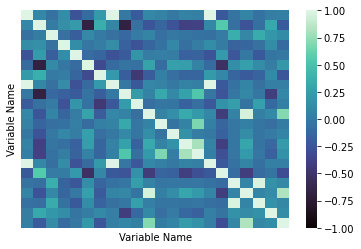

In [18]:
corr_calc = countryXindicator.corr()
sns.heatmap(corr_calc, vmin=-1, vmax=1, center=0, xticklabels=False, yticklabels=False, cmap='mako')

<AxesSubplot:xlabel='Variable Name', ylabel='Variable Name'>

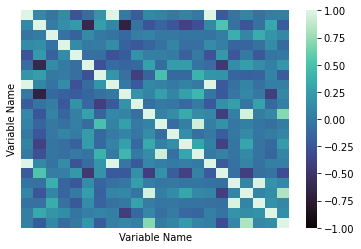

In [19]:
corr_calc = imputed_countryXindicator.corr()
sns.heatmap(corr_calc, vmin=-1, vmax=1, center=0, xticklabels=False, yticklabels=False, cmap='mako')

In [20]:
merged = imputed_countryXindicator.merge(aquastat_cc, how='inner', left_on="Area", right_on="Country").set_index("Code")

In [21]:
merged

,Agricultural water withdrawal as % of total renewable water resources,Agricultural water withdrawal as % of total water withdrawal,Dam capacity per capita,Dependency ratio,Flood occurrence (WRI),Industrial water withdrawal as % of total water withdrawal,Interannual variability (WRI),MDG 7.5. Freshwater withdrawal as % of total renewable water resources,Municipal water withdrawal as % of total withdrawal,National Rainfall Index (NRI),...,SDG 6.4.1. Services Water Use Efficiency,SDG 6.4.1. Water Use Efficiency,SDG 6.4.2. Water Stress,Seasonal variability (WRI),Total internal renewable water resources per capita,Total population with access to safe drinking-water (JMP),Total renewable water resources per capita,Total water withdrawal per capita,Urban population with access to safe drinking-water (JMP),Country
Code,,,,,,,,,,,,,,,,,,,,,
AFG,30.613807,98.169627,55.350280,28.722600,3.7,0.831988,2.5,31.045462,0.998385,185.000000,...,57.148622,0.923778,54.757019,2.5,1299.037172,55.3,1799.917253,561.297018,78.2,Afghanistan
ALB,2.996689,63.741372,1397.282892,10.927152,2.7,16.326243,1.2,3.933775,19.932385,1136.000000,...,21.852239,6.656907,7.139423,2.4,9326.776621,95.1,10470.953679,492.273511,94.9,Albania
DZA,57.178366,63.764099,208.248826,3.599897,2.8,1.825655,2.3,84.014742,34.410247,241.500000,...,23.068787,14.354620,137.920360,1.9,271.737627,83.6,281.885204,252.771322,84.3,Algeria
AND,57.771078,53.096413,996.177136,20.866262,3.3,18.168756,1.5,60.122626,28.734830,1071.311544,...,146.632709,86.300426,69.033809,1.6,4098.648070,100.0,4098.648070,422.680401,100.0,Andorra
AGO,0.098854,20.784925,316.775132,0.269542,1.7,33.947294,2.5,0.475539,45.267781,1137.000000,...,167.030879,142.467836,1.871883,3.1,4963.650317,49.0,4977.065588,23.671246,75.4,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1.261132,73.852110,5360.965420,39.245283,2.7,3.506097,2.7,1.707253,22.641793,1813.000000,...,25.304472,9.557190,7.540367,2.3,27378.639165,93.1,45064.219744,769.537023,95.0,Venezuela (Bolivarian Republic of)
VNM,8.794055,94.782397,472.677418,59.347147,3.8,3.747409,0.7,9.259150,1.470194,1991.000000,...,83.840791,2.349448,18.130315,3.2,3799.339725,97.6,9345.813361,867.118796,99.1,Viet Nam
YEM,154.047619,90.743338,16.615880,0.000000,2.9,1.823282,4.9,169.761905,7.433380,232.700000,...,47.023411,5.219357,169.761905,2.4,75.445075,54.9,75.445075,128.076996,72.0,Yemen


In [22]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is A8E6-B474

 Directory of C:\Users\joach\code-projects\WaterSecurity\unlabeled_preprocessing

12/05/2021  08:21    <DIR>          .
12/05/2021  08:21    <DIR>          ..
12/05/2021  08:11    <DIR>          .ipynb_checkpoints
11/05/2021  15:21             1,709 helpers.py
12/05/2021  08:21           136,834 prep_aquastat.ipynb
11/05/2021  15:21            47,960 prep_economic_v2.ipynb
11/05/2021  15:21           400,714 prep_edstats.ipynb
11/05/2021  15:21         2,790,867 prep_hdro_v2.ipynb
11/05/2021  15:21                 0 __init__.py
11/05/2021  15:28    <DIR>          __pycache__
               6 File(s)      3,378,084 bytes
               4 Dir(s)  838,000,263,168 bytes free


In [23]:
merged.to_csv("../data/unlabeled/aquastat_preprocessed.csv")